#  EastWestAirlines

##  KMeans Clustering

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
airlines = pd.read_csv("EastWestAirlines.csv")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Normalize the dataset 

In [4]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [5]:
norm = norm_func(airlines.iloc[:,1:])
norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


###   Optimal number of clusters using the elbow method  

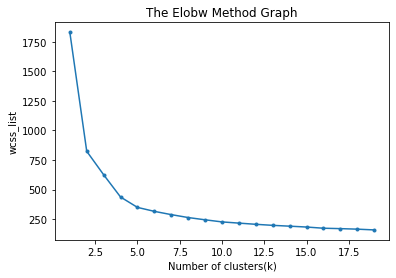

In [6]:
wcss_list= []
for i in range(1, 20):  
    kvalue = KMeans(n_clusters=i, init='k-means++')  
    kvalue.fit(norm)  
    wcss_list.append(kvalue.inertia_)  
plt.plot(range(1, 20), wcss_list, marker = ".") 
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

###  KMeans Clustering model 

In [28]:
values = KMeans(n_clusters=4)  
y_predict= values.fit_predict(norm)  
y_predict

array([3, 3, 3, ..., 2, 3, 3])

In [29]:
new_c=pd.Series(y_predict)  
airlines['cluster'] =  new_c
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [30]:
airlines.iloc[:,1:12].groupby(airlines.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,117976.519936,80.437002,3.561404,1.001595,1.022329,31073.451356,17.224880,225.030303,0.633174,4470.706539,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
3,40520.815442,89.978318,1.089900,1.017980,1.004231,3315.847171,6.463247,226.710735,0.658911,3605.113168,0.0


In [40]:
sklearn.metrics.silhouette_score(norm, new_c) 

0.4744941579482721

###    Visualization

Text(0.5, 1.0, 'Clusters using KMeans')

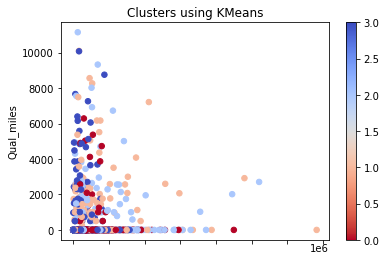

In [31]:
airlines.plot(x="Balance",y ="Qual_miles",c=values.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm_r) 
plt.title('Clusters using KMeans')

<AxesSubplot:xlabel='cluster', ylabel='Balance'>

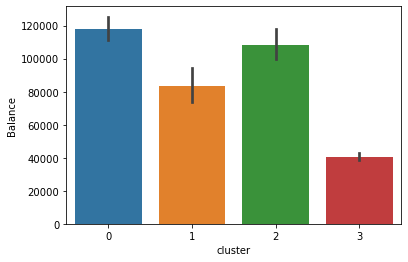

In [38]:
sns.barplot(data=airlines,x='cluster',y='Balance')

<AxesSubplot:xlabel='cluster', ylabel='Qual_miles'>

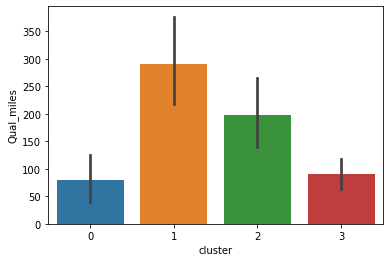

In [39]:
sns.barplot(data=airlines,x='cluster',y='Qual_miles')

<AxesSubplot:xlabel='cluster', ylabel='Flight_trans_12'>

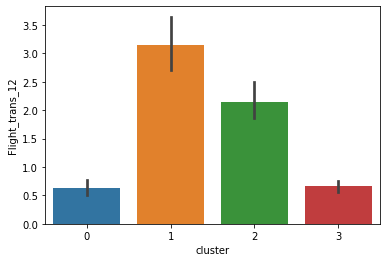

In [41]:
sns.barplot(data=airlines,x='cluster',y='Flight_trans_12')

##   Inference

###  While comparing, Cluster 0 has the highest number of miles for the award, but their number of miles counted as for topflight and the number of flight transaction in the past 12 months are very less. So, passengers who belongs to cluster 0 is not eligible for both award and top flight

###  Cluster 1 have a higher number of miles to get the top flight status and higher number of transactions in the past 12 months along with that comparatively they have number of miles that are eligible for the award

###  Passengers in Cluster 2 also have a higher number of miles to get the top flight status and awards. Also they have higher number of transactions in the past 12 months since they are enrolled for larger days 

###  Passengers in Cluster 3  have less number of miles so they are not elighible for topflight and award 

###  Therefore, the passengers who fall in the clusters having higher balance and qual_miles along with higher number of flight transaction  will get the access for topflight and award  